In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [3]:
Data = pd.read_csv('Dataset.csv')
Data.head()

,country,Region,Employment: Industry (% of employed),Education: Primary gross enrol. ratio (female per 100 pop.),"Population age distribution (60+ years, %)","Population age distribution (0-14 years, %)","Pop. using improved sanitation facilities (rural, %)","Pop. using improved sanitation facilities (urban, %)","Pop. using improved drinking water (rural, %)","Pop. using improved drinking water (urban, %)",...,Education: Secondary gross enrol. ratio (female per 100 pop.),Infant mortality rate (per 1000 live births,GDP per capita (current US$),Employment: Agriculture (% of employed),Employment: Services (% of employed),Individuals using the Internet (per 100 inhabitants),"Fertility rate, total (live births per woman)",Urban population (% of total population),Economy: Agriculture (% of GVA),happiness.score
0,Afghanistan,SouthernAsia,17.0,83.5,4.0,44.9,19.788235,32.217647,20.400000,32.400000,...,36.800000,60.1,544.0,47.1,35.8,8.3,5.4,24.8,27.3,3.575
1,Albania,SouthernEurope,18.6,107.3,17.9,18.7,50.100000,43.500000,58.870588,85.400000,...,95.100000,9.2,3939.0,41.4,40.0,63.3,1.7,57.4,22.5,4.959
2,Algeria,NorthernAfrica,31.0,113.0,8.9,28.7,23.100000,17.000000,65.900000,79.500000,...,91.623529,24.9,4178.0,10.3,58.7,38.2,3.0,70.8,12.1,5.605
3,Angola,MiddleAfrica,8.6,105.9,3.6,47.1,17.911765,31.111765,37.011765,66.811765,...,40.270588,78.2,4167.0,50.6,40.8,12.4,6.0,63.4,9.1,4.033
4,Argentina,SouthAmerica,23.7,111.2,14.9,25.2,65.994118,46.700000,77.464706,91.358824,...,110.200000,12.1,14971.0,0.3,76.1,68.0,2.3,91.5,6.1,6.574


### Countries in upper and lower quartile

In [16]:
print(Data['happiness.score'].quantile(0.25))
Data['happiness.score'].quantile(0.75)

4.51475


6.16800016593933

In [17]:
below = list()
above = list()

for index, row in Data.iterrows():
    if row['happiness.score'] < 4.51475:
        below.append(row['country'])
    if row['happiness.score'] > 6.16800016593933:
        above.append(row['country'])
#Countries below upper quatile
np.unique(below)

array(['Afghanistan', 'Angola', 'Armenia', 'Benin', 'Botswana',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Comoros',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Djibouti', 'Egypt',
       'Ethiopia', 'Gabon', 'Georgia', 'Ghana', 'Guinea', 'Haiti',
       'India', 'Iraq', 'Ivory Coast', 'Kenya', 'Lesotho', 'Liberia',
       'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Myanmar', 'Nepal',
       'Niger', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Sudan',
       'Sri Lanka', 'Sudan', 'Syria', 'Tanzania', 'Togo', 'Uganda',
       'Ukraine', 'Yemen', 'Zambia', 'Zimbabwe'], dtype='<U24')

In [18]:
#Countries above upper quatile
np.unique(above)

array(['Argentina', 'Australia', 'Austria', 'Belgium', 'Brazil', 'Canada',
       'Chile', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark',
       'Finland', 'France', 'Germany', 'Guatemala', 'Iceland', 'Ireland',
       'Israel', 'Kuwait', 'Luxembourg', 'Malta', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Oman', 'Panama', 'Qatar', 'Saudi Arabia',
       'Singapore', 'Spain', 'Suriname', 'Sweden', 'Switzerland',
       'Thailand', 'Trinidad and Tobago', 'United Arab Emirates',
       'United Kingdom', 'United States', 'Uruguay', 'Venezuela'],
      dtype='<U20')

In [4]:
EDA = pd.DataFrame(Data[['Employment: Industry (% of employed)', 'Employment: Agriculture (% of employed)', 'Employment: Services (% of employed)', 'Individuals using the Internet (per 100 inhabitants)', 'happiness.score', 'country']])

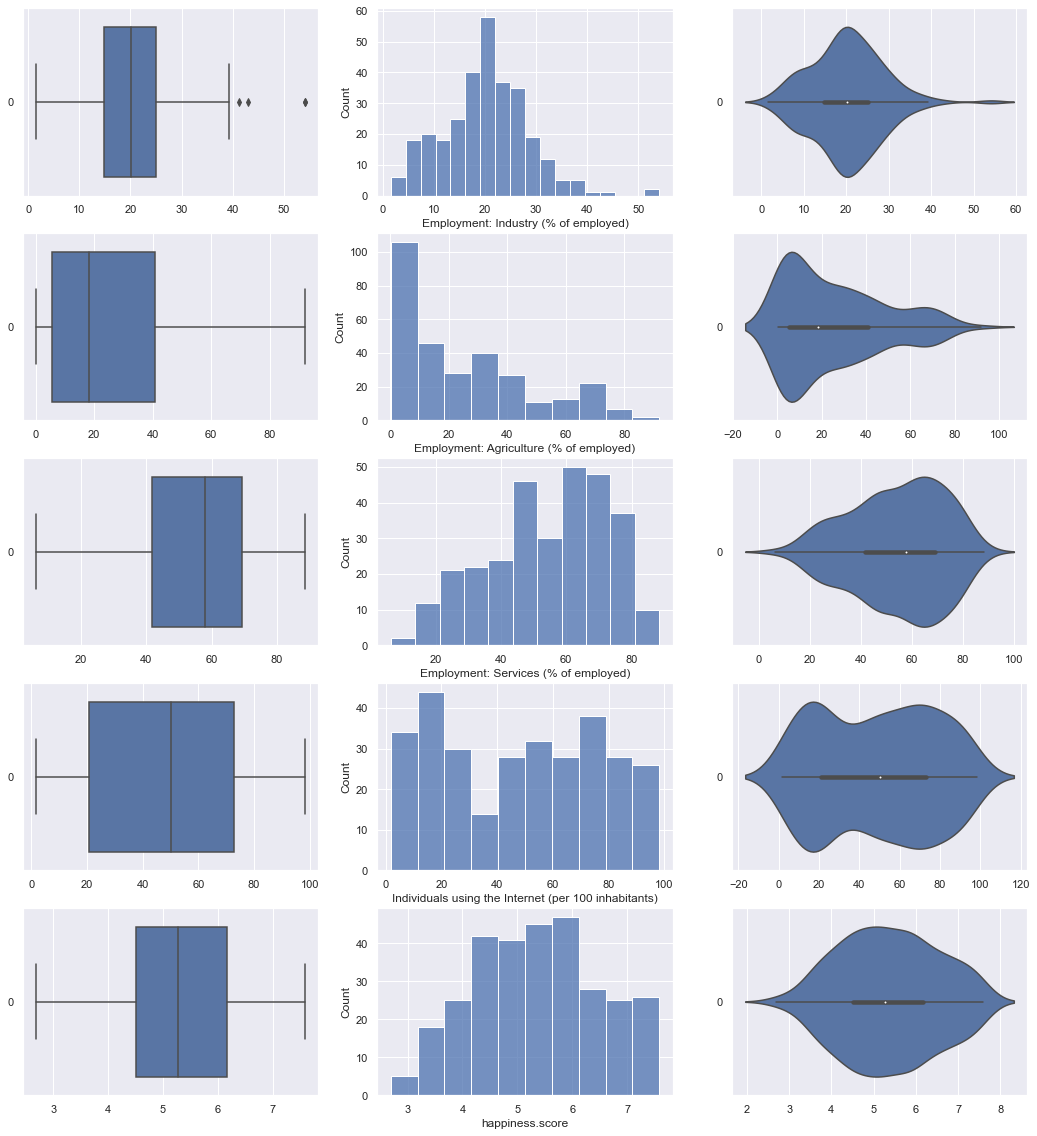

In [5]:
f, axes = plt.subplots(5, 3, figsize=(18, 20))

count = 0
for var in EDA:
    if(var != 'country'):
        sb.boxplot(data = EDA[var], orient = "h", ax = axes[count,0])
        sb.histplot(data = EDA[var], ax = axes[count,1])
        sb.violinplot(data = EDA[var], orient = "h", ax = axes[count,2])
        count += 1

<AxesSubplot:>

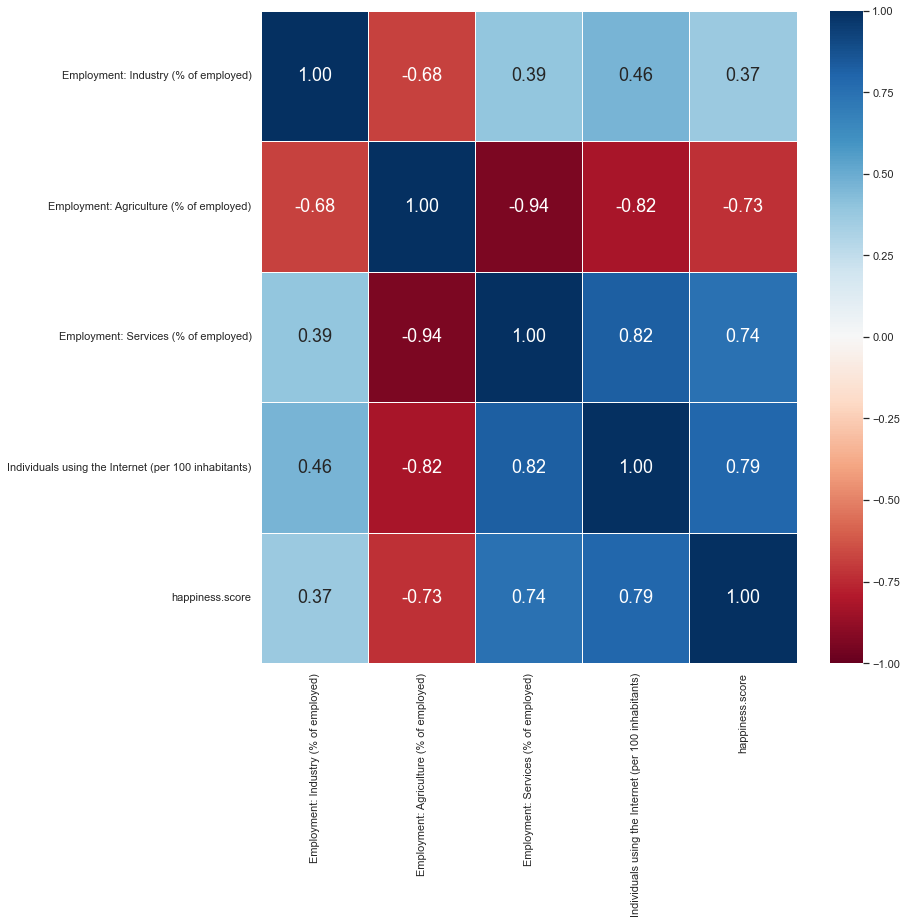

In [6]:
f = plt.figure(figsize=(12, 12))
sb.heatmap(EDA.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

In [7]:
agri = 'Employment: Agriculture (% of employed)'
serv = 'Employment: Services (% of employed)'
indu = 'Employment: Industry (% of employed)'
net = 'Individuals using the Internet (per 100 inhabitants)'


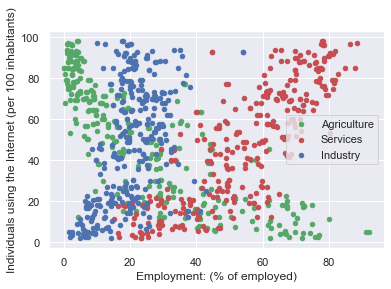

In [8]:
employnet = EDA.plot(kind = 'scatter', y = net, x = agri, color = 'g', label = 'Agriculture')
EDA.plot(kind = 'scatter', y = net, x = serv, color = 'r', label = 'Services', ax = employnet)
EDA.plot(kind = 'scatter', y = net, x = indu, color = 'b', label = 'Industry', ax = employnet)

employnet.set_xlabel('Employment: (% of employed)')
employnet.set_ylabel('Individuals using the Internet (per 100 inhabitants)')
plt.show()

Text(0.5, 0, 'Employment: (% of employed)')

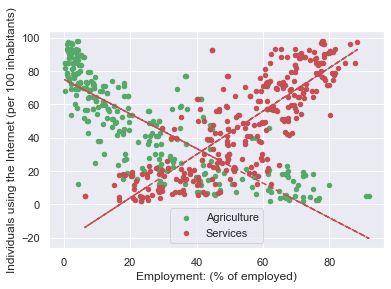

In [9]:
employnet = EDA.plot(kind = 'scatter', y = net, x = agri, color = 'g', label = 'Agriculture')
EDA.plot(kind = 'scatter', y = net, x = serv, color = 'r', label = 'Services', ax = employnet)

agriarr = EDA['Employment: Agriculture (% of employed)']
servarr = EDA['Employment: Services (% of employed)']
netarr = EDA['Individuals using the Internet (per 100 inhabitants)']

trend = np.polyfit(agriarr, netarr, 1)
p = np.poly1d(trend)
plt.plot(agriarr,p(agriarr),"r--")
trend2 = np.polyfit(servarr, netarr, 1)
p = np.poly1d(trend2)
plt.plot(servarr,p(servarr),"r--")
employnet.set_xlabel('Employment: (% of employed)')

### Observation :
As one can see there is a trend line of a relation between certain employment against internet usage.
Perhaps due to the nature of services, it is required to have internet usage for services to be done better.
In contrast to agriculture where more time would be spend on the field leading to lesser time on the internet